# EcoFOCIpy ADCP QC - 22BSP-5A

- mostly remove >100 cm/s flows in u/v


In [2]:
import xarray as xa
import numpy as np

import matplotlib.pyplot as plt

from EcoFOCIpy.plots import TimeSeriesStickPlot

In [4]:
xdf = xa.load_dataset('/Users/bell/ecoraid/2022/Moorings/22ckp1a/final_data_cf/22ckp1a_velein_0035m.nc')

/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)
/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)
/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)
/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)
/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabe

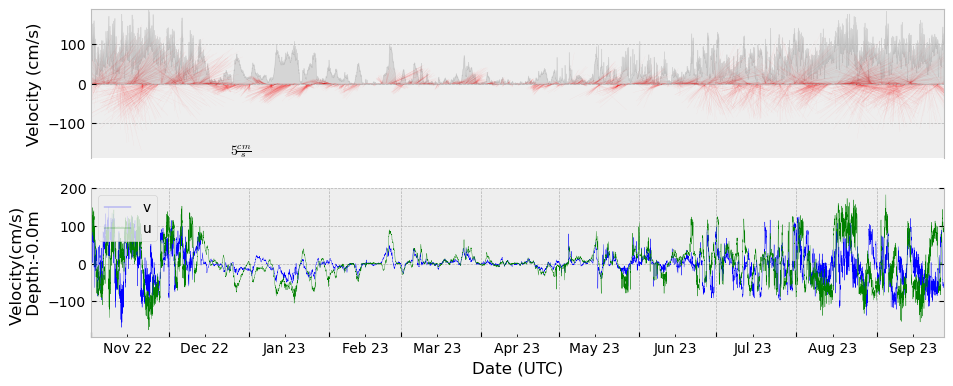

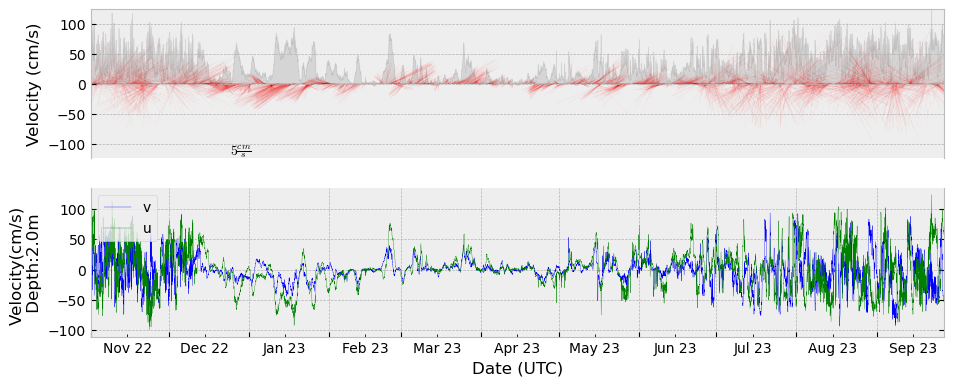

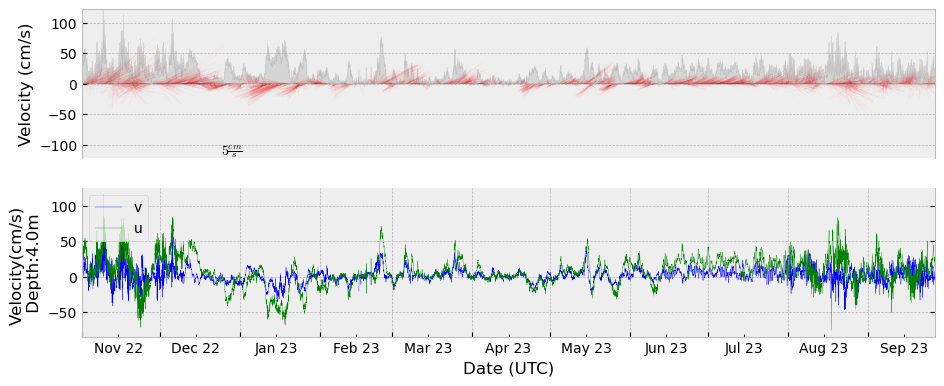

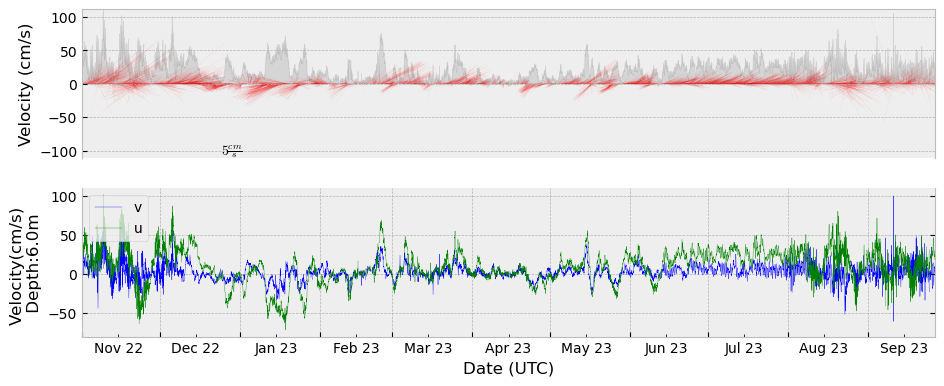

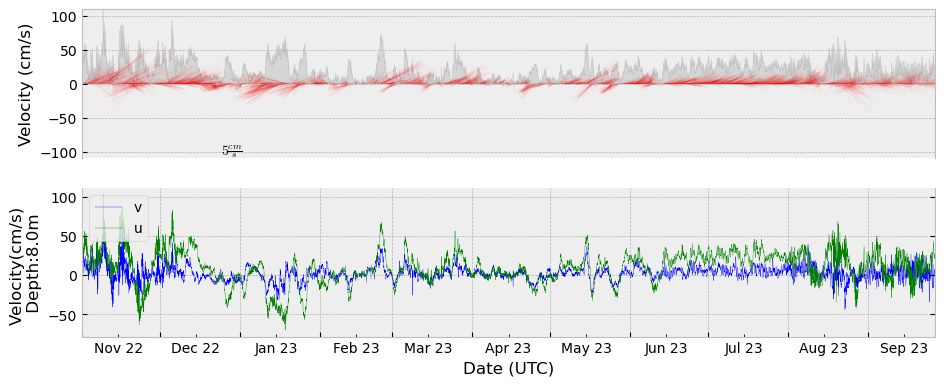

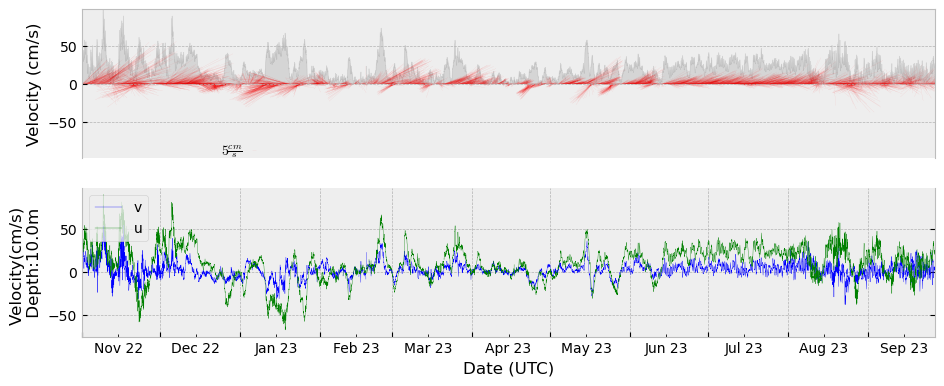

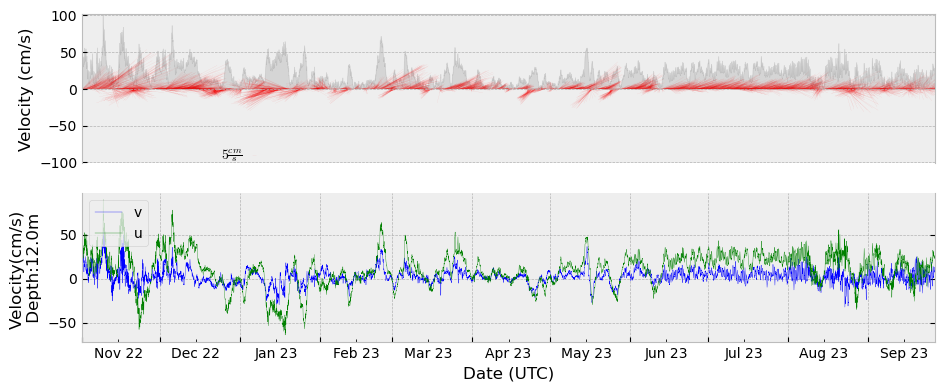

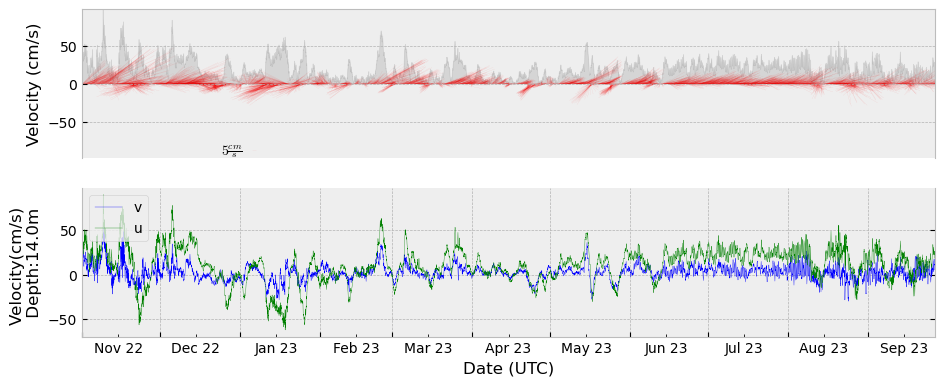

In [5]:
for i in range(0,len(xdf),1):
    try:
        p1 = TimeSeriesStickPlot.Timeseries1dStickPlot()
        plt1, fig1 = p1.plot(timedata=xdf.time, 
                         udata=xdf.isel(depth=i,latitude=0,longitude=0).u_curr_comp, 
                         vdata=xdf.isel(depth=i,latitude=0,longitude=0).v_curr_comp,
                         rotate=0,
                         ylabel = f'Velocity(cm/s) \n {xdf.isel(depth=i).depth.values}m ')
        plt1.ylabel(f'Velocity(cm/s) \n Depth:{xdf.isel(depth=i).depth.values}m ')
    except:
        pass

## BAsed on above plots - choose a relavant cutoff velocity (usually 100 or 500 cm/s)

In [6]:
xdf =xdf.where(xdf.u_curr_comp <=500,np.nan)
xdf

<xarray.Dataset>
Dimensions:          (latitude: 1, longitude: 1, time: 7919, depth: 22)
Coordinates:
  * time             (time) datetime64[ns] 2022-11-01 ... 2023-09-26T22:00:00
  * depth            (depth) float64 -10.0 -8.0 -6.0 -4.0 ... 28.0 30.0 32.0
  * latitude         (latitude) float64 70.84
  * longitude        (longitude) float64 -163.1
Data variables:
    u_curr_comp      (latitude, longitude, time, depth) float64 64.01 ... nan
    v_curr_comp      (latitude, longitude, time, depth) float64 -25.41 ... nan
    w_curr_comp      (latitude, longitude, time, depth) float64 19.2 0.6 ... nan
    w_curr_comp_err  (latitude, longitude, time, depth) float64 -1.4 1.1 ... nan
    agc1             (latitude, longitude, time, depth) float64 40.0 ... nan
    agc2             (latitude, longitude, time, depth) float64 43.0 ... nan
    agc3             (latitude, longitude, time, depth) float64 47.0 ... nan
    agc4             (latitude, longitude, time, depth) float64 45.0 ... nan
Attributes:
    Latitude_DegMMddW:                      70 50.163 N
    Longitude_DegMMddN:                     163 7.765 W
    MooringID:                              22CKP-1A
    platform_deployment_date:               2022-10-16T18:37:00Z
    platform_deployment_cruise_name:        SKQ2022-14S
    platform_recovery_date:                 2023-09-26T21:42:00Z
    platform_recovery_cruise_name:          SKQ202312S
    platform_deployment_recovery_comments:  MTR's on release were not deployed.
    WaterDepth:                             44.0
    date_created:                           2024-03-06T10:42:06Z
    date_modified:                          
    QC_indicator:                           unknown

In [19]:
# xdf['history'] = xdf.history + 'QC of high u/v values'

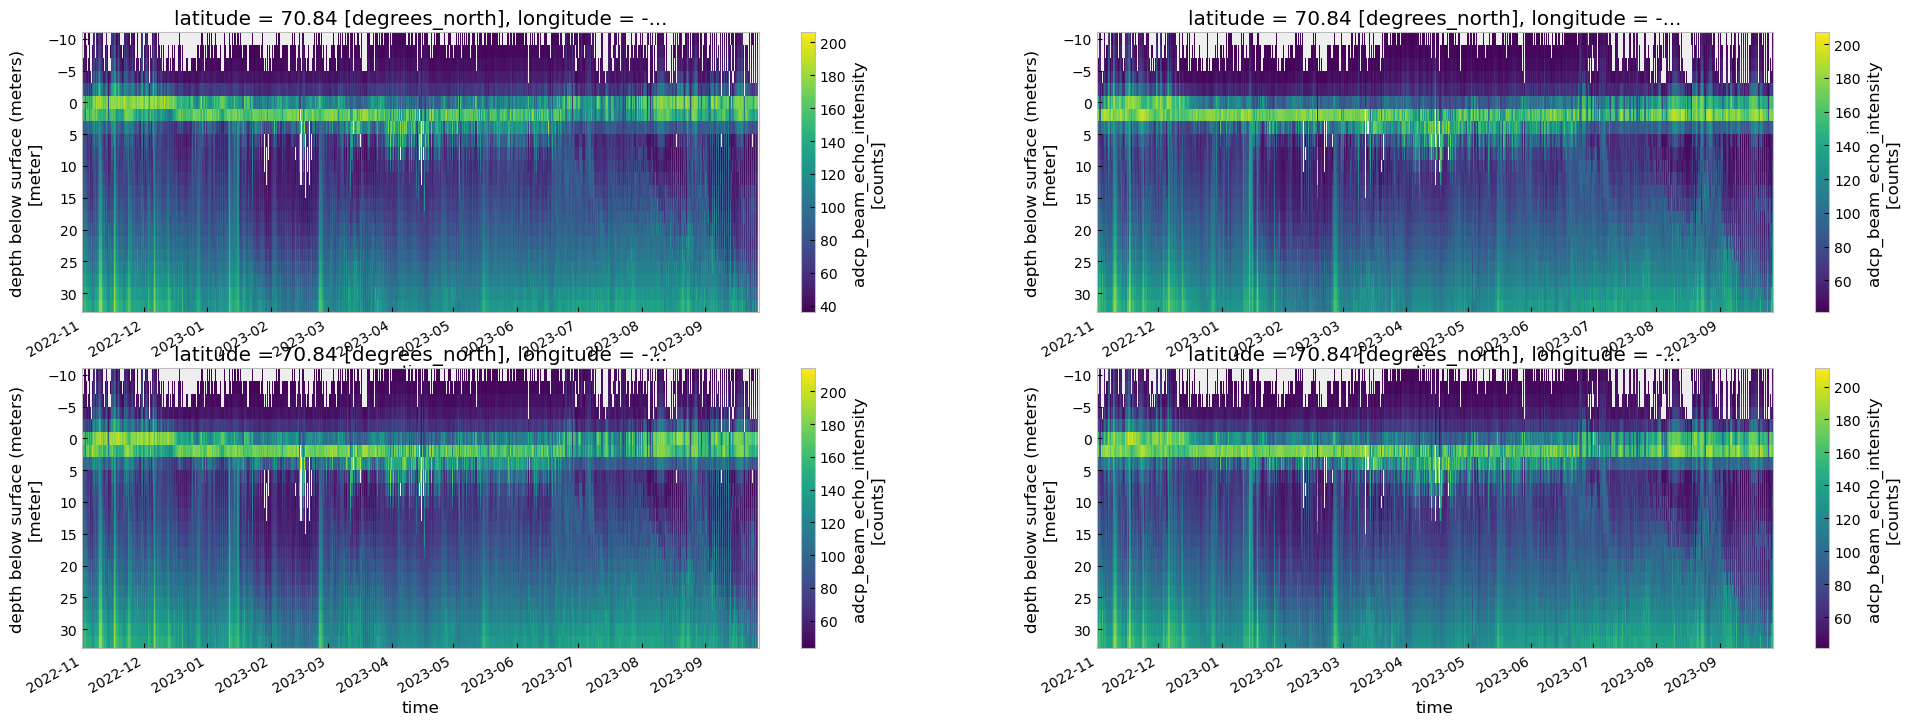

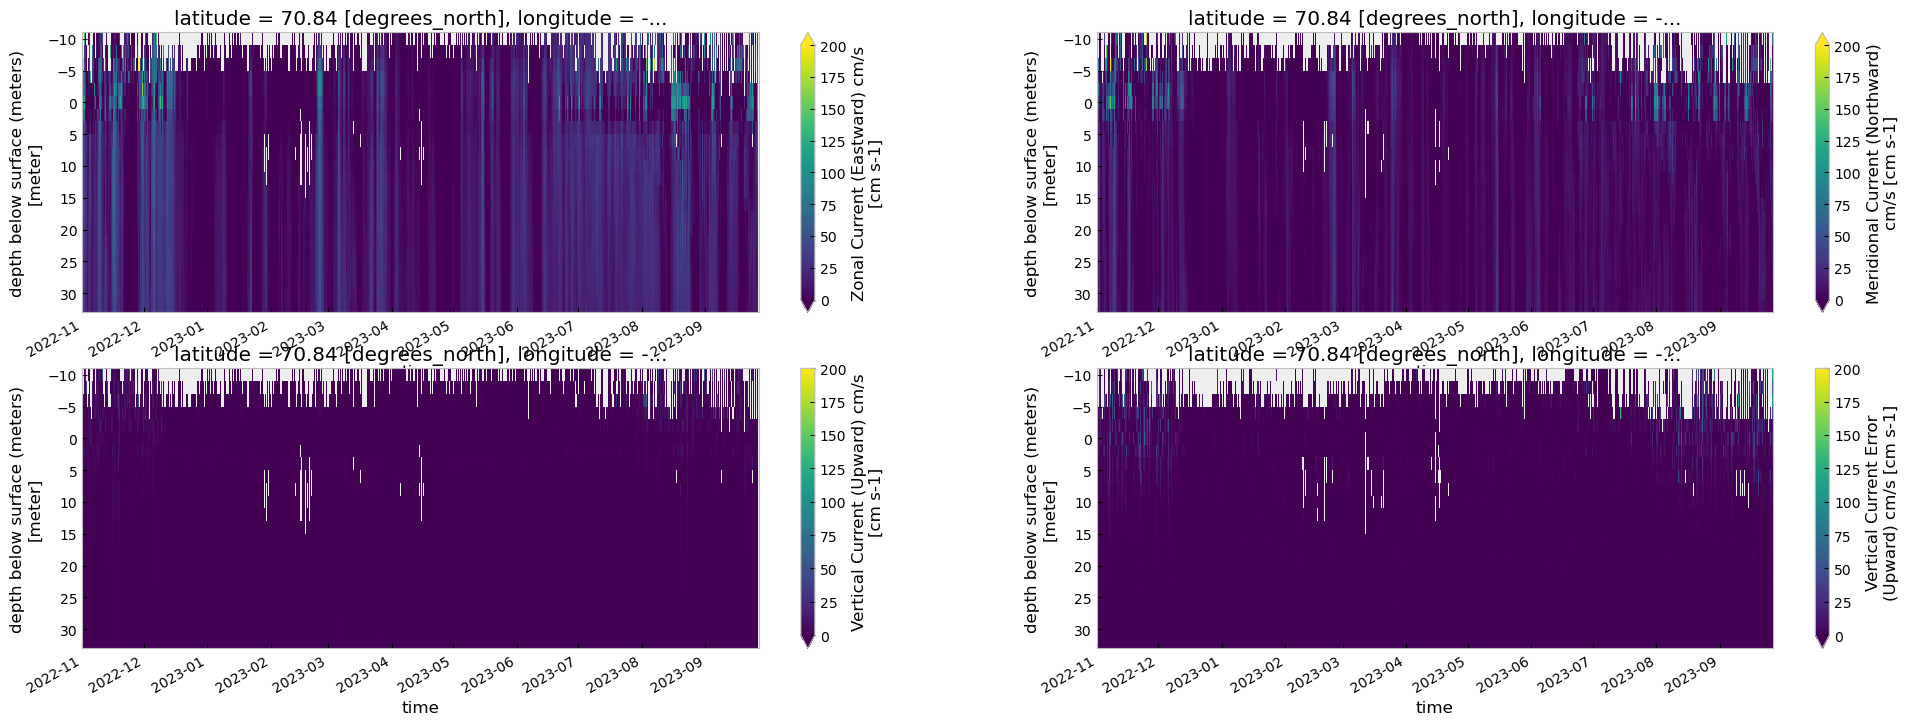

In [8]:
#optional plotting

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    xdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    xdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    xdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    xdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [9]:
try:
    xdf.attrs['history'] = xdf.attrs['history']+'  removed U,V >500cm/s'
except:
    xdf.attrs['history'] = '  removed U,V >500cm/s'    

## Trim above surface (negative values)

In [10]:
ixdf = xdf.where(xdf.depth >=-0.).dropna(how='all',dim='depth')

In [11]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  trimmed above surface'

In [12]:
ixdf.to_netcdf('22ckp1a_0035m.trimmed.nc')

In [13]:
xdf = xa.load_dataset('22ckp1a_0035m.trimmed.nc')

In [14]:
ixdf = xdf.interpolate_na(dim='time',use_coordinate=True,max_gap='2H')

In [15]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  linearly interpolated 1hour gaps'

In [16]:
ixdf = ixdf.interpolate_na(dim='depth',max_gap=3)

In [17]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  linearly interpolated 2 vertical bin'

## Interpolate over singleton missing gaps linearly

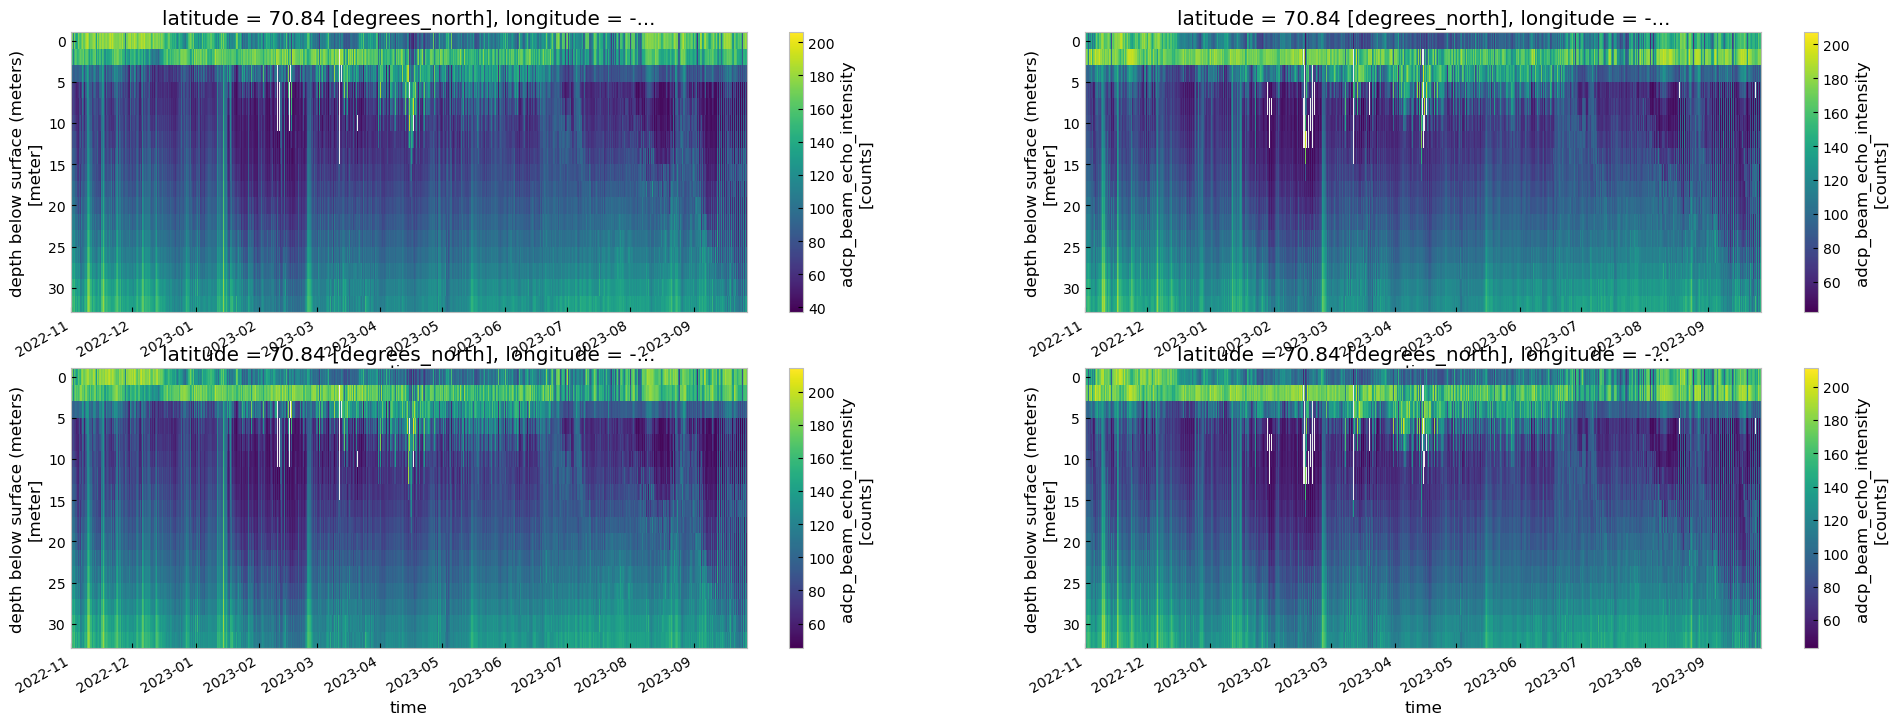

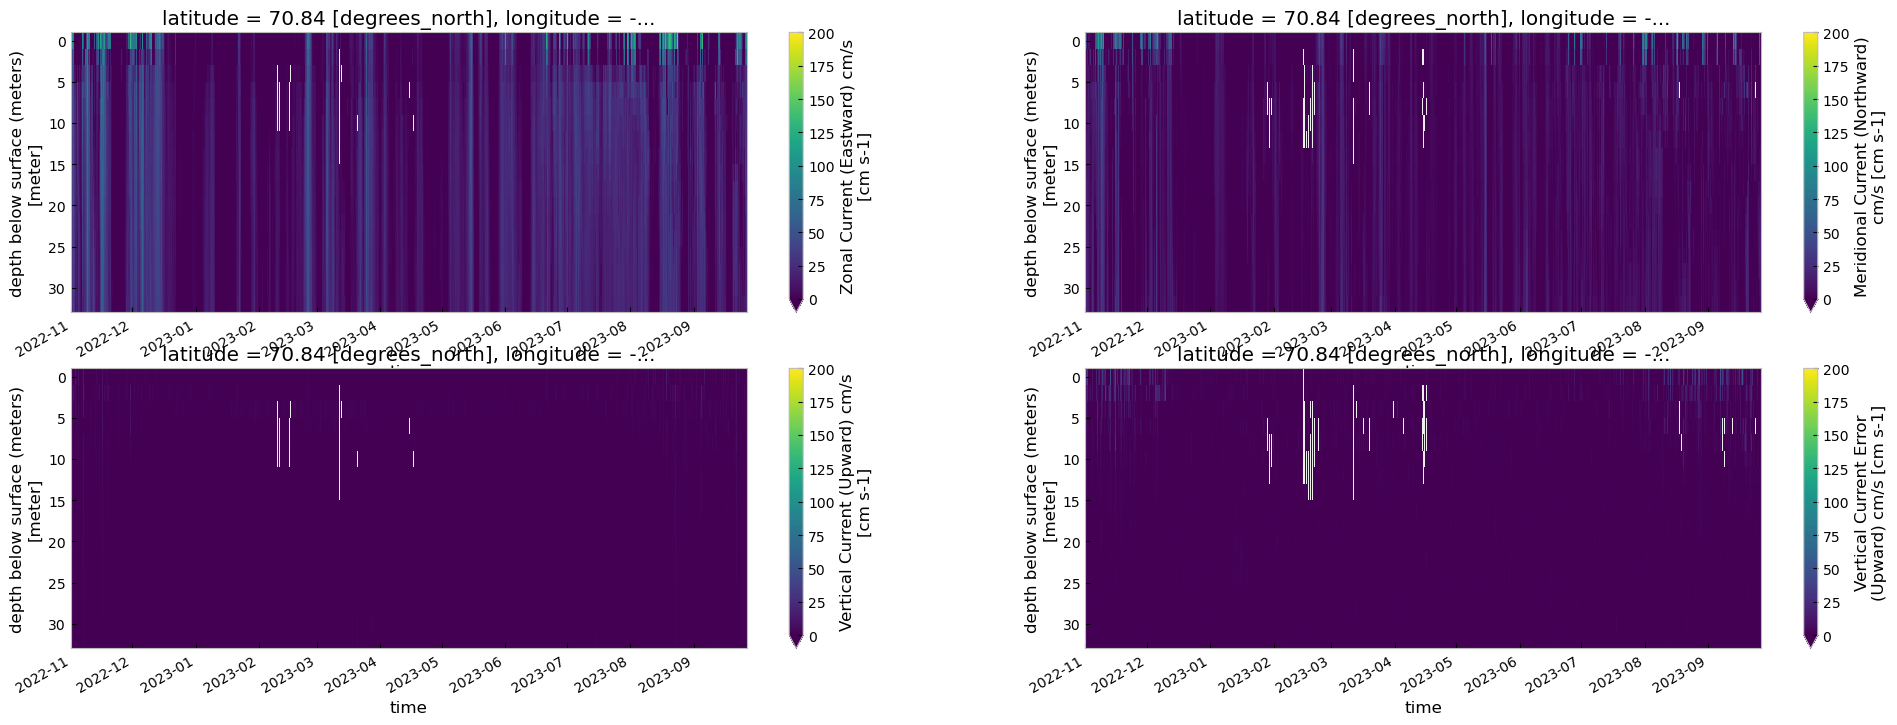

In [18]:

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    ixdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    ixdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    ixdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    ixdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [19]:
ixdf.to_netcdf('22ckp1a_0035m.filtered.nc')